<a href="https://colab.research.google.com/github/Nageswar-Sahoo/Computer-Vision-Project/blob/main/S9/different_lr_training_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Nageswar-Sahoo/Computer-Vision-Project.git

Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 1045, done.
remote: Counting objects: 100% (1045/1045), done.
remote: Compressing objects: 100% (833/833), done.
remote: Total 1045 (delta 677), reused 436 (delta 188), pack-reused 0
Receiving objects: 100% (1045/1045), 4.04 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (677/677), done.


In [6]:
#!pip install albumentations==0.4.6
!pip install -U git+https://github.com/albumentations-team/albumentations
import albumentations 
from albumentations.pytorch import ToTensorV2

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-25yf3k5g
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-25yf3k5g


In [9]:
cat config.json

{
    "name": "CIFR10",
    "trainer": {
        "epochs": 24,
        "save_dir": "saved/",
        "save_period": 1,
        "verbosity": 2,
        "monitor": "min val_loss",
        "early_stop": 40,
        "tensorboard": true
    }
}


In [1]:
ls

Computer-Vision-Project/  sample_data/


In [2]:
cd ..

/


In [3]:
cd content

/content


In [4]:
rm -rf Computer-Vision-Project

In [7]:
cd Computer-Vision-Project/template

/content/Computer-Vision-Project/template


In [8]:
from parse_config import ConfigParser
from trainer import Trainer
from utils import prepare_device
import model.loss as module_loss
import model.metric as module_metric
import torch.optim as optim
import logging
import numpy as np
import torch
import model.customresnet as module_resnet

SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
import torch
import data_loader.data_loaders as data_loaders

In [12]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.01, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, verbose=False, three_phase=True,  max_lr=.01, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [12]:
trainer = main() #.01

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [14]:
trainer = main() #.001

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [12]:
trainer = main() #.05

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [15]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

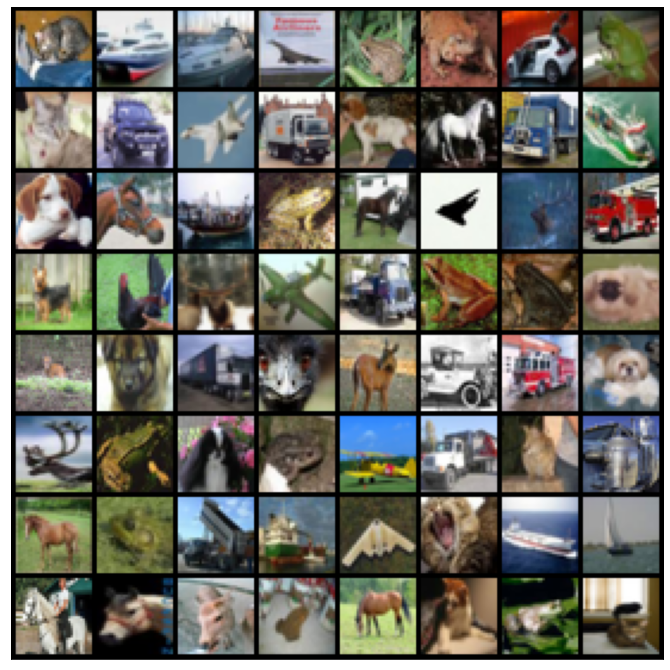

In [16]:
show_batch(trainer.valid_data_loader)

In [9]:
scheduler.state_dict()

{'_get_lr_called_within_step': False,
 '_last_lr': [0.0010000064050541715],
 '_schedule_phases': [{'end_lr': 'max_lr',
   'end_momentum': 'base_momentum',
   'end_step': 489.0,
   'start_lr': 'initial_lr',
   'start_momentum': 'max_momentum'},
  {'end_lr': 'min_lr',
   'end_momentum': 'max_momentum',
   'end_step': 2351,
   'start_lr': 'max_lr',
   'start_momentum': 'base_momentum'}],
 '_step_count': 2353,
 'anneal_func': <bound method OneCycleLR._annealing_cos of <torch.optim.lr_scheduler.OneCycleLR object at 0x7f936d008090>>,
 'base_lrs': [0.001],
 'cycle_momentum': True,
 'last_epoch': 2352,
 'total_steps': 2352,
 'use_beta1': True,
 'verbose': False}

In [12]:
trainer = main()#.01

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
length
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_ru

In [14]:
trainer = main() #.001

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
length
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  

In [20]:
trainer = main()

Files already downloaded and verified
length
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  

ValueError: ignored

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = CustomResnet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
             ReLU-14          [-1, 128,

In [14]:
!pip install torch-lr-finder


In [4]:
#!pip install torch-lr-finder -v --global-option="apex"
!pip install torch-lr-finder


  0%|          | 0/1000 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.65E-06


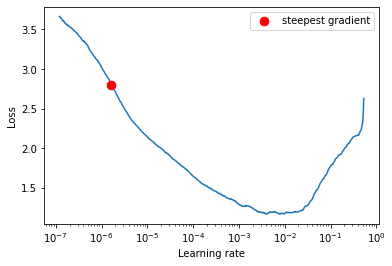

In [13]:
from torch_lr_finder import LRFinder
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainer.data_loader, end_lr=10, num_iter=1000)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state


In [6]:
trainer.train()

Train Epoch: last_lr_used_1  0.001000 1 [0/98 (0%)] Loss: 3.806878
Train Epoch: last_lr_used_1  0.001049 1 [22/98 (22%)] Loss: 1.921703
Train Epoch: last_lr_used_1  0.001187 1 [44/98 (45%)] Loss: 1.766438
Train Epoch: last_lr_used_1  0.001410 1 [66/98 (67%)] Loss: 1.573300
Train Epoch: last_lr_used_1  0.001716 1 [88/98 (90%)] Loss: 1.503828
    epoch          : 1
    loss           : 1.8281961326696434
    accuracy       : 35.233596786929056
    val_loss       : 1.3390593230724335
    val_accuracy   : 51.37293198529412
Saving checkpoint: saved/models/CIFR10/1128_133942/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: last_lr_used_1  0.001880 2 [0/98 (0%)] Loss: 1.502212
Train Epoch: last_lr_used_1  0.002293 2 [22/98 (22%)] Loss: 1.428319
Train Epoch: last_lr_used_1  0.002769 2 [44/98 (45%)] Loss: 1.293558
Train Epoch: last_lr_used_1  0.003300 2 [66/98 (67%)] Loss: 1.311035
Train Epoch: last_lr_used_1  0.003875 2 [88/98 (90%)] Loss: 1.269025
    epoch      

In [11]:
trainer.train()

Train Epoch: last_lr_used_1  0.001000 1 [0/98 (0%)] Loss: 3.450124
Train Epoch: last_lr_used_1  0.001049 1 [22/98 (22%)] Loss: 1.929798
Train Epoch: last_lr_used_1  0.001187 1 [44/98 (45%)] Loss: 1.641789
Train Epoch: last_lr_used_1  0.001410 1 [66/98 (67%)] Loss: 1.607223
Train Epoch: last_lr_used_1  0.001716 1 [88/98 (90%)] Loss: 1.476277
    epoch          : 1
    loss           : 1.763429419118531
    accuracy       : 37.53103361880466
    val_loss       : 1.343169891834259
    val_accuracy   : 51.032858455882355
Saving checkpoint: saved/models/CIFR10/1128_135853/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: last_lr_used_1  0.001880 2 [0/98 (0%)] Loss: 1.416143
Train Epoch: last_lr_used_1  0.002293 2 [22/98 (22%)] Loss: 1.285931
Train Epoch: last_lr_used_1  0.002769 2 [44/98 (45%)] Loss: 1.333184
Train Epoch: last_lr_used_1  0.003300 2 [66/98 (67%)] Loss: 1.243600
Train Epoch: last_lr_used_1  0.003875 2 [88/98 (90%)] Loss: 1.175245
    epoch        

In [13]:
trainer.train()#With dropout .1
 #optimizer = optim.Adam(model.parameters(), lr=.01, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    #scheduler = optim.lr_scheduler.OneCycleLR(optimizer, verbose=False, three_phase=True,  max_lr=.01, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))


Train Epoch: last_lr_used_1  0.000400 1 [0/98 (0%)] Loss: 3.138836
Train Epoch: last_lr_used_1  0.000452 1 [22/98 (22%)] Loss: 1.758455
Train Epoch: last_lr_used_1  0.000599 1 [44/98 (45%)] Loss: 1.670936
Train Epoch: last_lr_used_1  0.000838 1 [66/98 (67%)] Loss: 1.493475
Train Epoch: last_lr_used_1  0.001163 1 [88/98 (90%)] Loss: 1.408902
    epoch          : 1
    loss           : 1.7224292803783805
    accuracy       : 38.80407631802721
    val_loss       : 1.3000296890735625
    val_accuracy   : 54.19921875
Saving checkpoint: saved/models/CIFR10/1128_141435/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: last_lr_used_1  0.001339 2 [0/98 (0%)] Loss: 1.395695
Train Epoch: last_lr_used_1  0.001779 2 [22/98 (22%)] Loss: 1.327198
Train Epoch: last_lr_used_1  0.002287 2 [44/98 (45%)] Loss: 1.117743
Train Epoch: last_lr_used_1  0.002854 2 [66/98 (67%)] Loss: 1.074874
Train Epoch: last_lr_used_1  0.003467 2 [88/98 (90%)] Loss: 1.083207
    epoch          : 2

In [12]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.01, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, verbose=False, three_phase=True,  max_lr=.01, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, tra

In [12]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.01, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, cycle_momentum=True, verbose=False, three_phase=True,  max_lr=.01, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

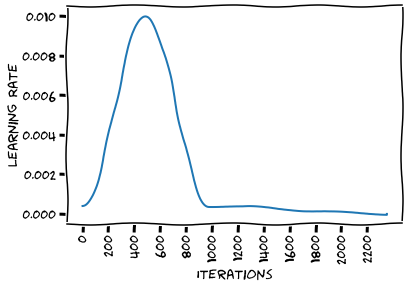

In [18]:
import matplotlib.pyplot as plt

plt.xkcd()
plt.xlabel("Iterations")
plt.ylabel("Learning Rate")
plt.xticks(np.arange(0, len(trainer.lrused), step=200), rotation=90)
plt.plot(trainer.lrused)
plt.savefig('onecycle_lr_fixmom.jpg')

In [19]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.001, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, cycle_momentum=True,anneal_strategy='linear', verbose=False, three_phase=True,  max_lr=.04, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

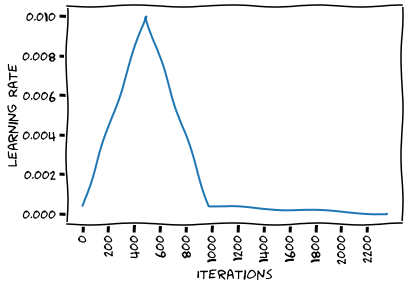

In [20]:
import matplotlib.pyplot as plt

plt.xkcd()
plt.xlabel("Iterations")
plt.ylabel("Learning Rate")
plt.xticks(np.arange(0, len(trainer.lrused), step=200), rotation=90)
plt.plot(trainer.lrused)
plt.savefig('onecycle_lr_fixmom.jpg')

In [22]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.001, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, cycle_momentum=True,anneal_strategy='linear', verbose=False, three_phase=True,  max_lr=.03, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


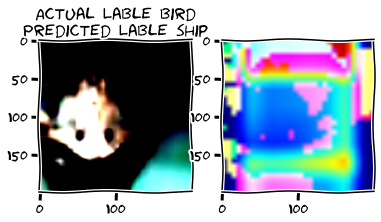

1
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


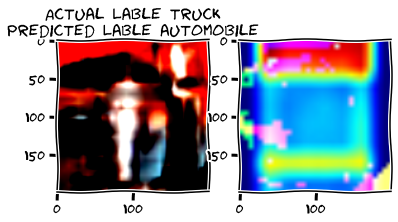

2
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


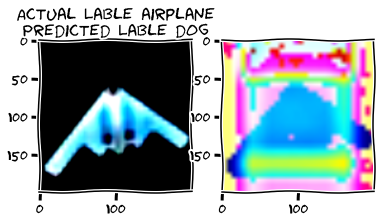

3
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


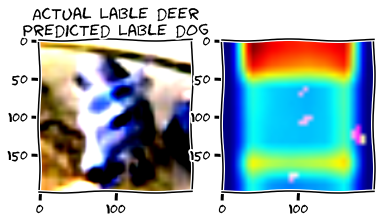

4
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


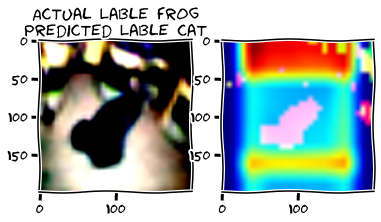

5
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


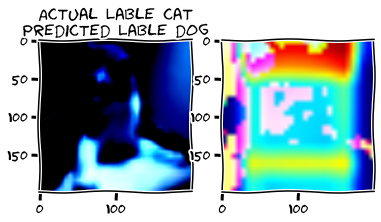

6
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


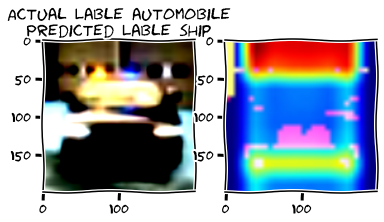

7
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


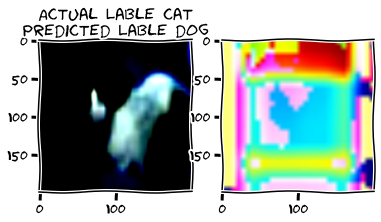

8
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


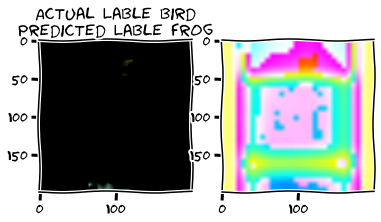

9
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


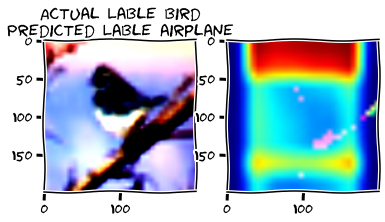

10
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


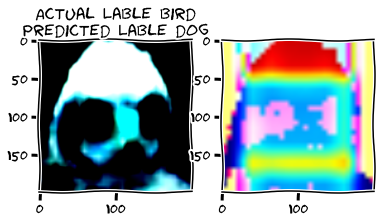

11
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


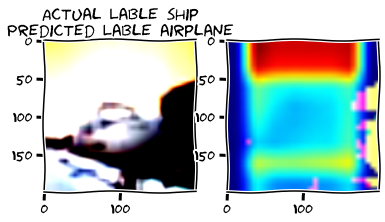

12
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


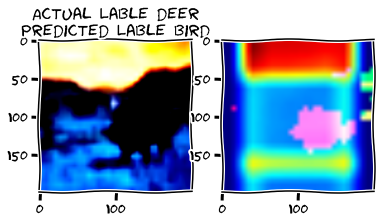

13
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


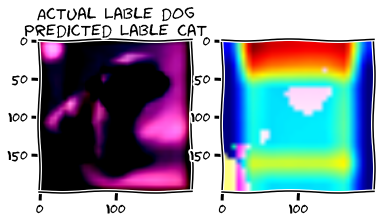

14
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


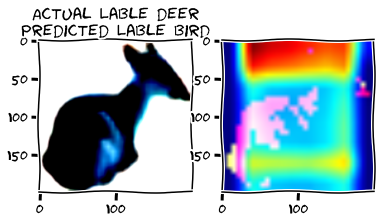

15
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


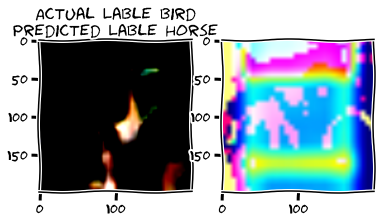

16
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


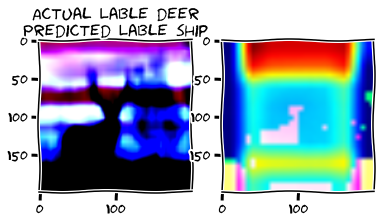

17
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


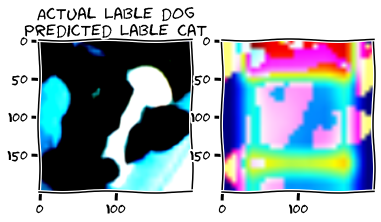

18
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


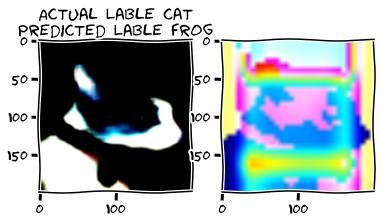

19
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


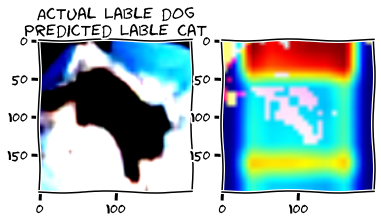

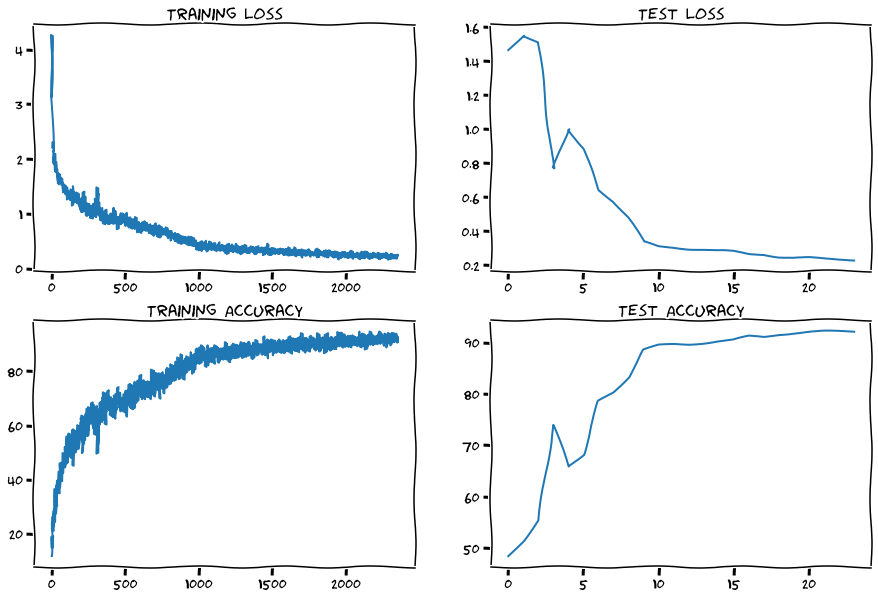

In [25]:
import utils 
utils.showandcam_missclassifiedimage(trainer)
utils.showaccuracy_and_loss_curve(trainer)

In [9]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.001, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, cycle_momentum=True,anneal_strategy='linear', verbose=False, three_phase=True,  max_lr=.03, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, tra

In [9]:
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()

    data_loader = data_loaders.get_train_data_loader(512)

    valid_data_loader = data_loaders.get_test_data_loader(512)

    # build model architecture, then print to console
    model = module_resnet.CustomResnet()

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    optimizer = optim.Adam(model.parameters(), lr=.03, weight_decay=1e-4)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.001)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, cycle_momentum=True,anneal_strategy='linear', verbose=False, three_phase=True,  max_lr=.03, pct_start=5/24, epochs=24, steps_per_epoch=len(data_loader))

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)

    # utils.showandcam_missclassifiedimage(trainer)
    # utils.showaccuracy_and_loss_curve(trainer)
    trainer.train()




/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ResNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): ReLU()
  )
  (layer1): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, ep